In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
import random

In [2]:
# Load data
file_path = 'train/'
data_lst = []
for filename in os.listdir(file_path):
    if 'dog' not in filename and 'cat' not in filename:
        continue
    real_file_path = file_path + filename
    img = Image.open(real_file_path) # HD --> RAM
    img = img.resize((64, 64)) # Uniform image size, tuple inside
    data = np.array(img) # 64 x 64 x 3
    data = data.reshape(64*64*3, 1) # Flatten
    if 'cat' in filename:
        data_lst.append((data, 1, img))
    elif 'dog' in filename:
        data_lst.append((data, 0, img))

In [3]:
X_lst = list(data_lst[i][0] for i in range(len(data_lst)))
Y_lst = list(data_lst[i][1] for i in range(len(data_lst)))
img_lst = list(data_lst[i][2] for i in range(len(data_lst)))

In [4]:
# Convert Python list to numpy array
X = np.array(X_lst)
Y = np.array(Y_lst)

In [5]:
# Convert to array with correct dimensions
X = X.reshape(X.shape[0], X.shape[1])
Y = Y.reshape(Y.shape[0], 1)
X = X.T
Y = Y.T
print('X.shape:', X.shape)
print('Y.shaoe:', Y.shape)

X.shape: (12288, 1002)
Y.shaoe: (1, 1002)


In [6]:
# Normalization
min_X = np.min(X)
max_X = np.max(X)
X = (X - min_X)/(max_X - min_X)

In [13]:
# Initializing parameters of a 2-layer neural network
np.random.seed(0)
N0, m = X.shape
N1 = 10
N2 = 1
# Initialize W1
W1 = (np.random.rand(N0, N1)-0.5) * 0.1 # Prevent from explosion
# Initialize B1
B1 = (np.random.rand(N1, 1)-0.5) * 0.1
# Initialize W2
W2 = (np.random.rand(N1,N2)-0.5) * 0.1
# Initialize B2
B2 = (np.random.rand(N2, 1)-0.5) * 0.1

In [14]:
# You should see 32.838553644951105
print(np.sum(W1))

32.838553644951105


In [9]:
# You should see -1.0433989293244808
print(np.sum(B1))

-1.0433989293244808


In [ ]:
# You should see -0.4229774016622794
print(np.sum(W2))

In [ ]:
# You should see -0.4841141325352224
print(np.sum(B2))

In [15]:
#################### Training ####################
alpha = 0.02
cost_history = []
for epoch in range(8000):
    
    # Forward Pass
    K1 = W1.T.dot(X) + B1
    A1 = np.maximum(K1, 0)
    K2 = W2.T.dot(A1) + B2
    H = 1/(1+np.exp(-K2))
    L = -(Y*np.log(H) + (1-Y)*np.log(1-H))
    J = (1/m)*np.sum(L)
    cost_history.append(J)
    if epoch % 200 == 0:
        print('Cost:', J)
    
    # Backward Pass
    dK2 = (1/m)*np.sum(H-Y, axis=0, keepdims=True)
    dW2 = A1.dot(dK2.T)
    dB2 = np.sum(dK2, axis=1, keepdims=True)
    dA1 = W2.dot(dK2)
    dK1 = dA1 * np.where(K1 > 0, 1, 0)
    dW1 = X.dot(dK1.T)
    dB1 = np.sum(dK1, axis=1, keepdims=True)
    
    # Updates 
    W1 = W1 - alpha * dW1
    W2 = W2 - alpha * dW2
    B1 = B1 - alpha * dB1
    B2 = B2 - alpha * dB2
    

Cost: 4.4240924570669
Cost: 0.690820494109235
Cost: 0.6865098887994462
Cost: 0.6816761048574077
Cost: 0.6773203604367843
Cost: 0.6714896283459852
Cost: 0.6654768465400358
Cost: 0.659065009089826
Cost: 0.6524161326142939
Cost: 0.6451931504341923
Cost: 0.6373006628377266
Cost: 0.6297963776517779
Cost: 0.6222852280755772
Cost: 0.6145868564282034
Cost: 0.6068449842033768
Cost: 0.5992806919650319
Cost: 0.5917594417517185
Cost: 0.5842609173192687
Cost: 0.5766798497989671
Cost: 0.569152199593014
Cost: 0.5616835478568653
Cost: 0.5539776579416917
Cost: 0.5459421771472094
Cost: 0.5377921952500516
Cost: 0.5297877750766574
Cost: 0.5217492727771214
Cost: 0.5133948624949668
Cost: 0.5048883051594328
Cost: 0.496459567366664
Cost: 0.48818936308521843


Text(0.5, 1.0, 'Costs over iterations')

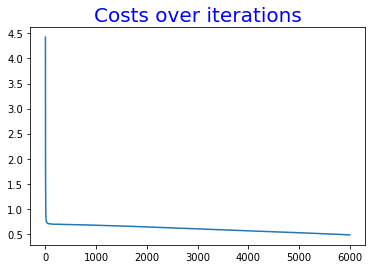

In [16]:
plot_x = list(range(len(cost_history)))
plot_y = cost_history
plt.plot(plot_x, plot_y)
plt.title("Costs over iterations", color = 'blue', fontdict = {'fontsize': 20})

In [ ]:
count = 0
K1 = np.dot(W1.T, X) + B1
A1 = np.maximum(0, K1)
K2 = np.dot(W2.T, A1) + B2
A2 = 1 / (1+np.exp(-K2))
print(A2)
wrong_result = []
for i in range(Y.shape[1]):
    y = 0 if A2[0][i] < 0.5  else 1
    if y == Y[0][i]:
        count += 1
    else:
        wrong_result.append(i)
print('Training Accuracy:', count/Y.shape[1])
print(Y)

In [ ]:
#################### Testing #################### 

In [ ]:
# file_path = 'test/'
# num_data = 0
# correct = 0
# X_test = []
# Y_test = []
# for filename in os.listdir(file_path):
#     if 'cat' not in filename and 'dog' not in filename:
#         continue
#     real_file_path = file_path+filename
#     img = Image.open(real_file_path)
#     img = img.resize((64, 64))
#     arr = np.array(img)
#     arr = arr.reshape(64*64*3, 1)
#     arr = arr / 255
#     X_test.append(arr)
#     if 'cat' in filename:
#         Y_test.append(1)
#     else:
#         Y_test.append(0)

In [ ]:
# X_test = np.asarray(X_test)
# Y_test = np.asarray(Y_test)

# Y_test = Y_test.reshape(1, 100)
# print('Y_test.shape:', Y_test.shape)
# X_test = X_test.reshape(X_test.shape[0], X_test.shape[1])
# X_test = X_test.T
# print('X_test.shape:',X_test.shape)

In [ ]:
# Z1 = np.dot(W1.T, X) + B1
# A1 = np.maximum(0, Z1)
# Z2 = np.dot(W2.T, A1) + B2
# H_test = 1/(1+np.exp(-Z2))
# num_data = 100
# correct = 0
# for i in range(100):
#     y_predict = 1 if H_test[0][i] < 0.5 else 0
#     if y_predict == Y_test[0][i]:
#         correct += 1

In [ ]:
# print('Number of data:', num_data)
# print('Accuracy:', correct/num_data)